In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV


In [151]:
sns.set_style("whitegrid")

In [152]:
df= pd.read_csv("stage2.csv",index_col=0)

In [153]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 3647
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3221 non-null   object 
 1   Year                                                              3221 non-null   int64  
 2   Access to electricity (% of population)                           3221 non-null   float64
 3   Access to clean fuels for cooking                                 3221 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3221 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3221 non-null   float64
 6   Electricity from nuclear (TWh)                                    3221 non-null   float64
 7   Electricity from renewables (TWh)

In [92]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3.221000e+03,3221.000000,3221.000000,3221.000000,3.221000e+03
mean,2009.510711,78.008545,63.675334,33.668386,72.851208,13.920003,24.272459,37.184934,26433.841959,5.461837,1.598665e+05,3.861703,12778.634719,227.492704,6.521633e+05
std,5.751880,30.917636,39.246824,30.178873,354.203364,74.478653,101.831308,34.358878,35936.269051,3.577152,7.736611e+05,5.230545,19175.349023,708.046753,1.634789e+06
min,2000.000000,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030000,1.000000e+01,-62.075920,111.927225,2.000000,2.100000e+01
25%,2005.000000,56.900000,23.400000,7.080000,0.300000,0.000000,0.060000,2.943516,2951.367200,3.300000,2.020000e+03,1.800226,1322.820364,30.000000,2.805100e+04
50%,2010.000000,97.867050,84.100000,25.260000,3.100000,0.000000,1.590000,28.962818,13342.630000,4.470000,1.050000e+04,3.844995,4413.062005,83.000000,1.184840e+05
75%,2014.000000,100.000000,100.000000,56.700000,27.570000,0.000000,9.410000,64.285710,34507.516000,6.160000,6.058000e+04,5.896232,14700.334340,214.000000,5.131200e+05
max,2019.000000,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,123.139555,123514.196700,8358.000000,9.984670e+06


In [154]:
# Dividing dataframe into 3 parts. 2004 data, 2017 data and other years data. 
total= df
data_2004= df[df['Year']==2004]
data_2017= df[df['Year']==2017]
df= df[(df['Year']!=2004) & (df['Year']!=2017)]

In [155]:
# Deleting Entity and Year, as they are not required anymore for EDA.
col= ['Entity','Year']
for i in col:
    del df[i]
    del data_2004[i]
    del data_2017[i]
    del total[i]

# EDA

Correlation analysis 


<AxesSubplot:>

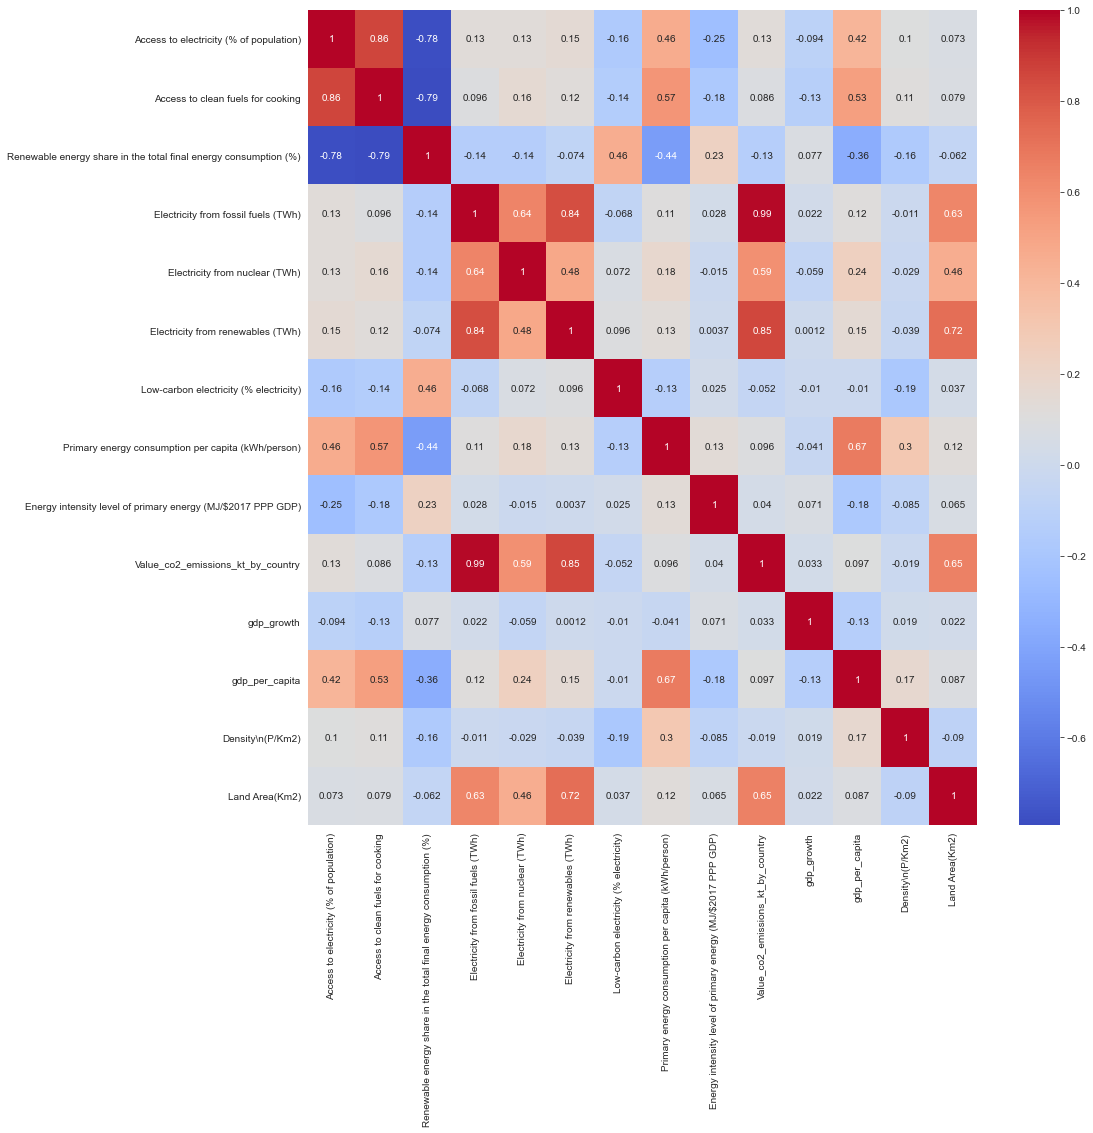

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

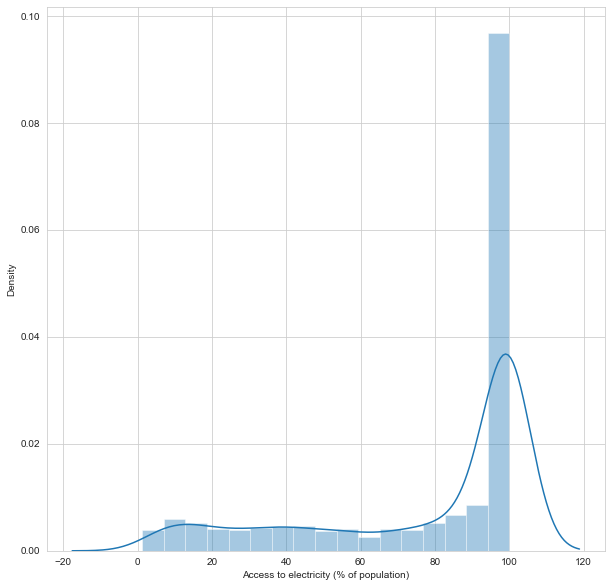

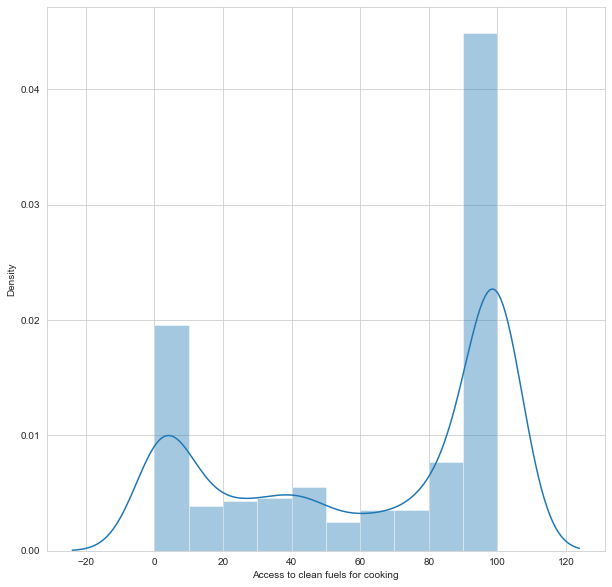

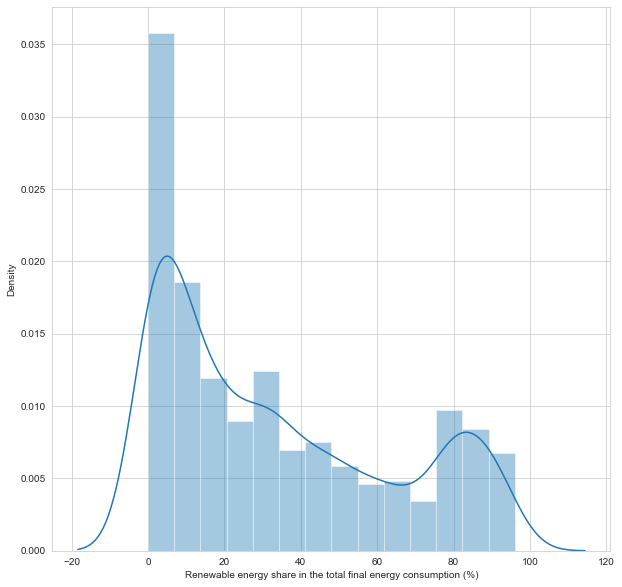

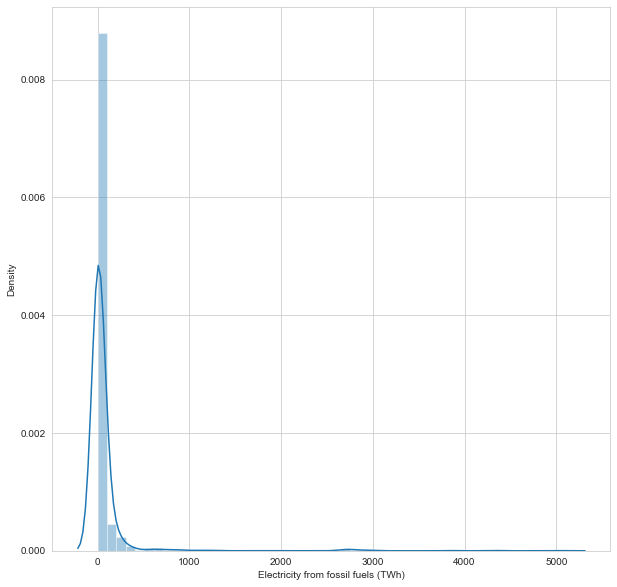

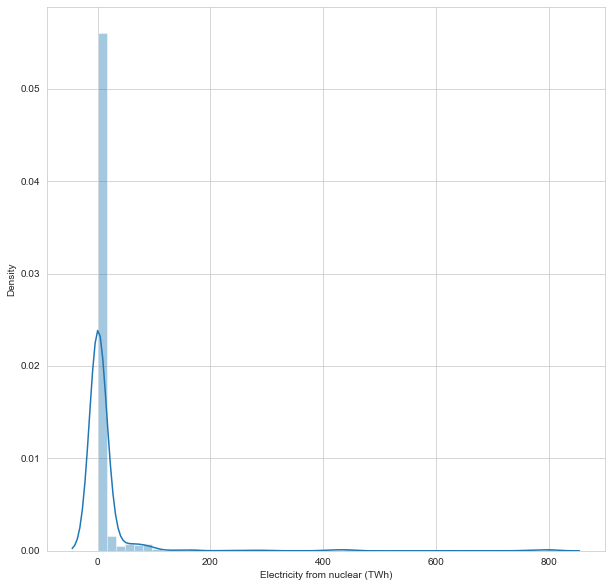

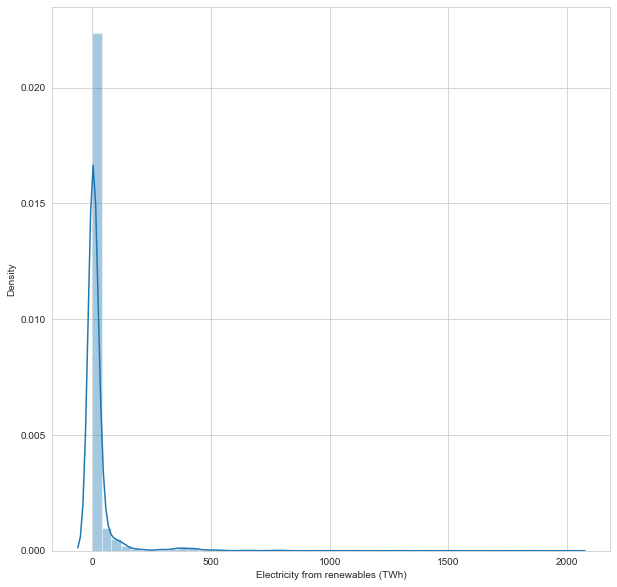

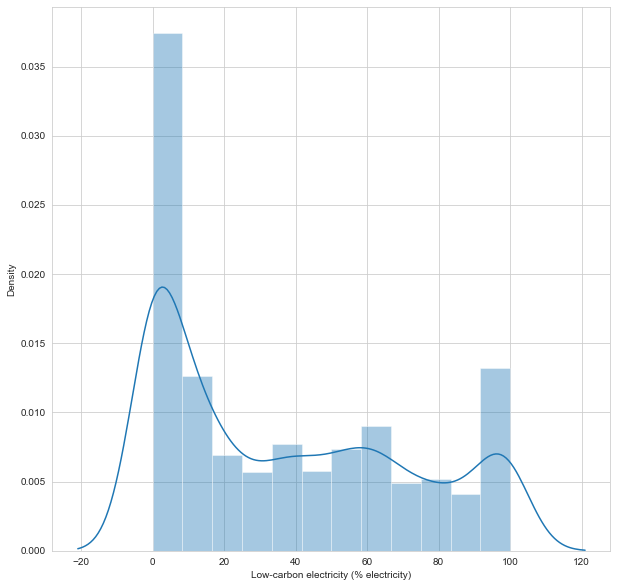

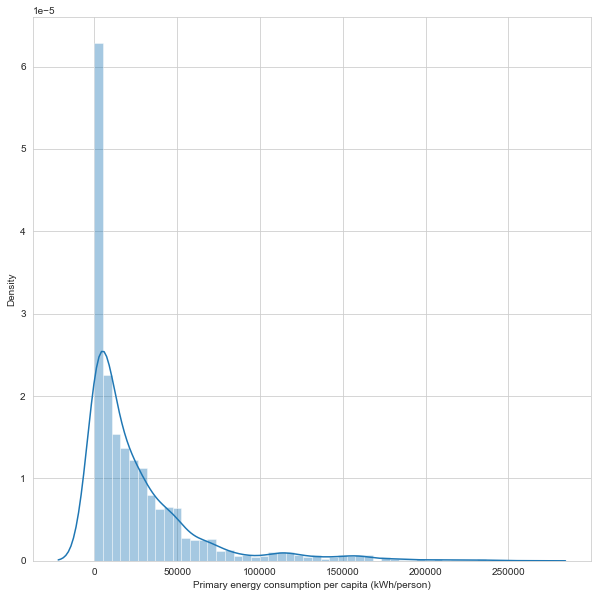

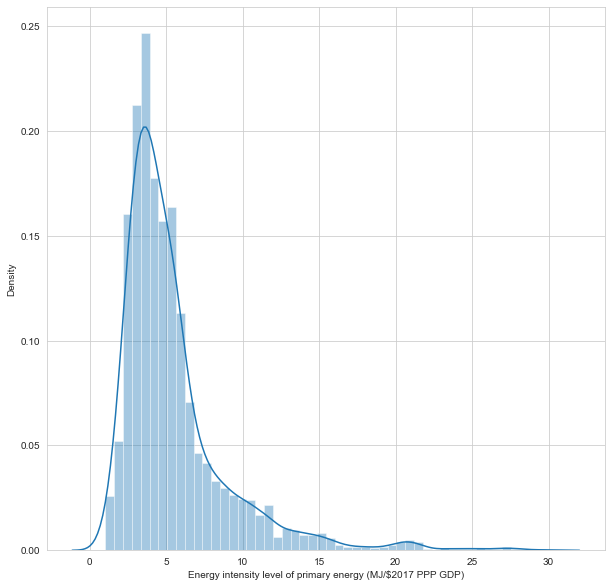

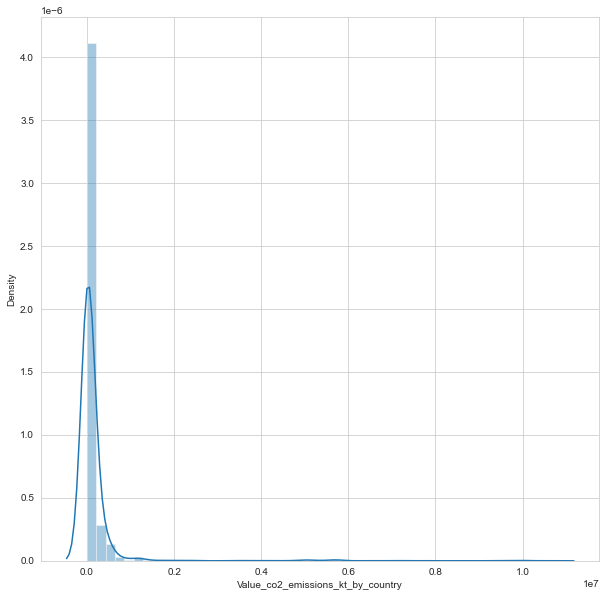

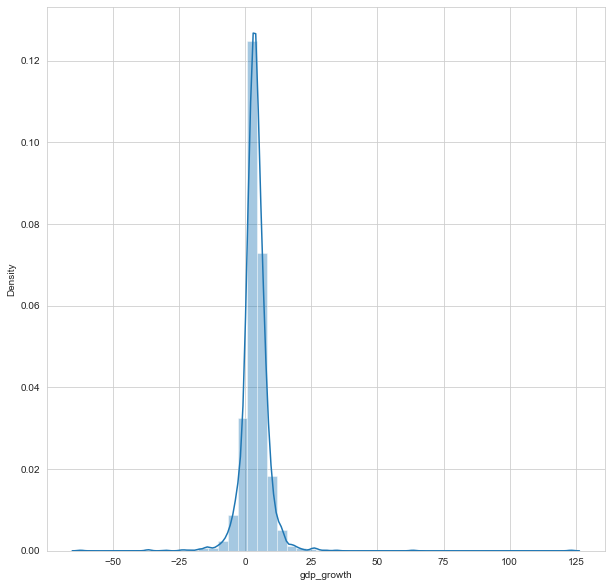

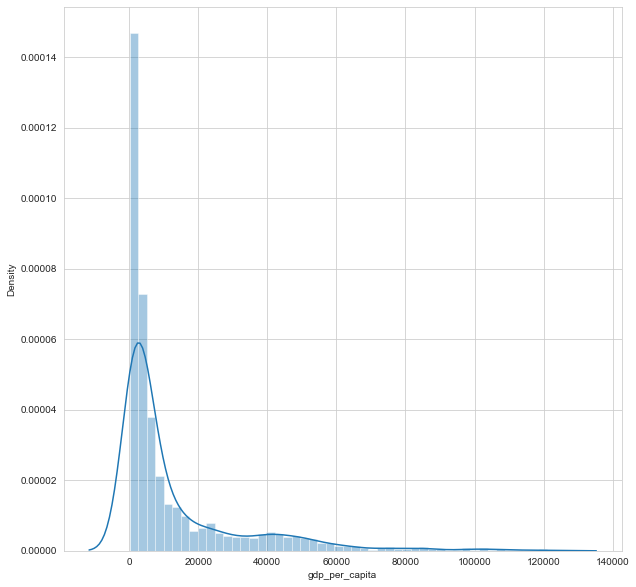

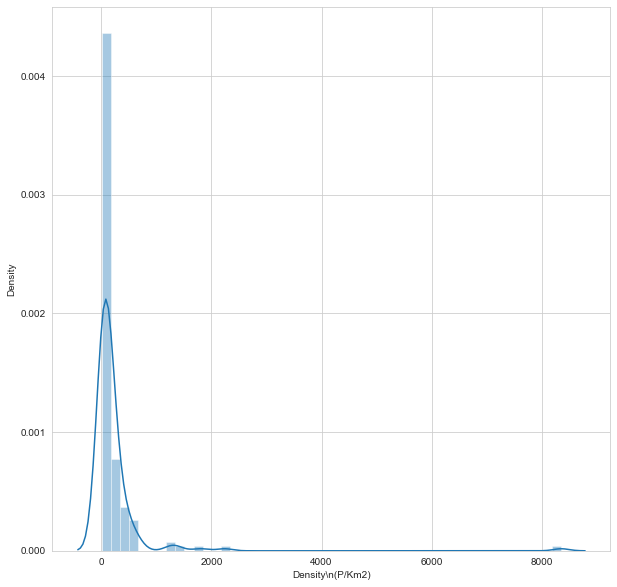

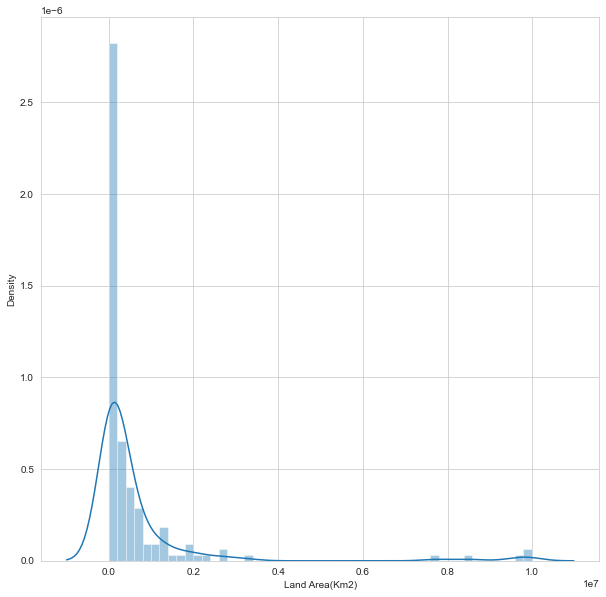

In [96]:
# Univariate Analysis 
col= df.columns
for i in col:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i],kde=True)

In [11]:
# corr_feature= pd.DataFrame()
# for i in col:
    # l= list(corr[corr[i]>0.4][i].index)
    # new_list=[]
    # print(i)
    # print(l)
    # for j in l:
         
            # if j!=i:
            #new_list= new_list.append(j)
            #print(i)
            #print(j)
            
    # print("{} : {}, Features: {} \n\n".format(i,new_list,len(new_list)))


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

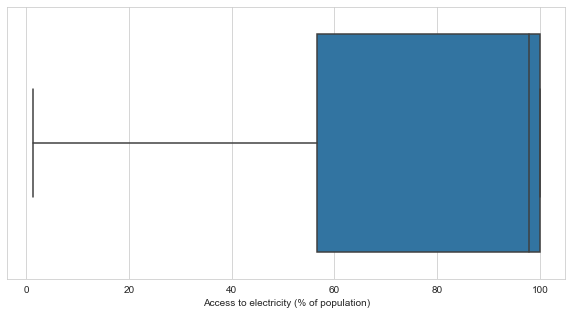

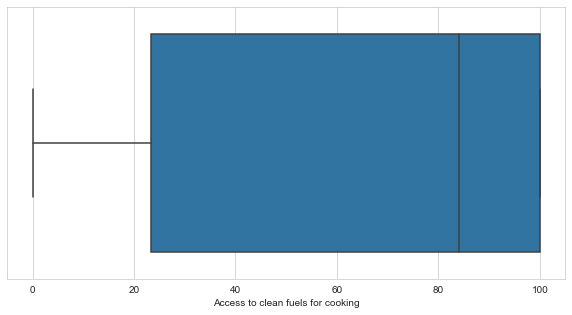

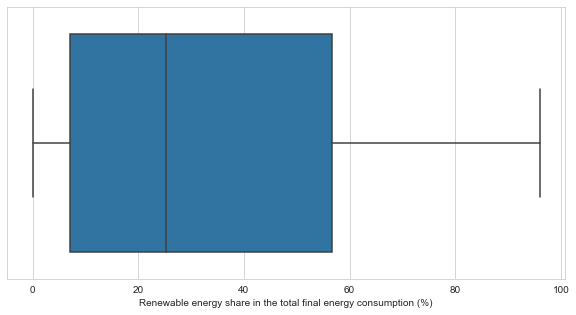

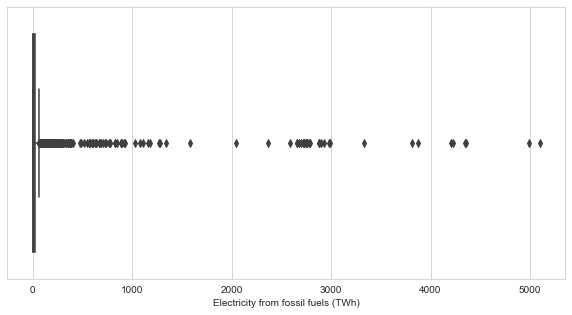

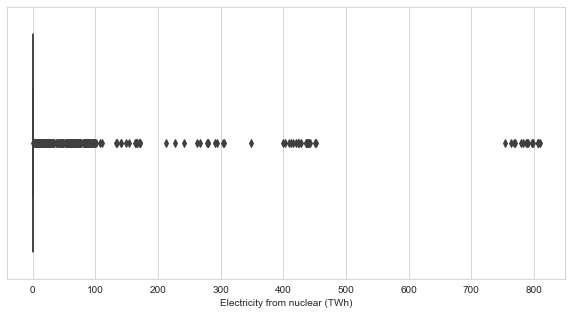

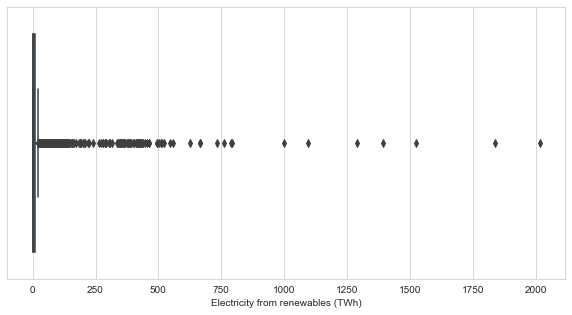

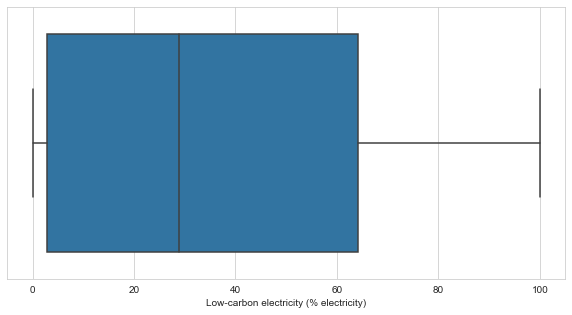

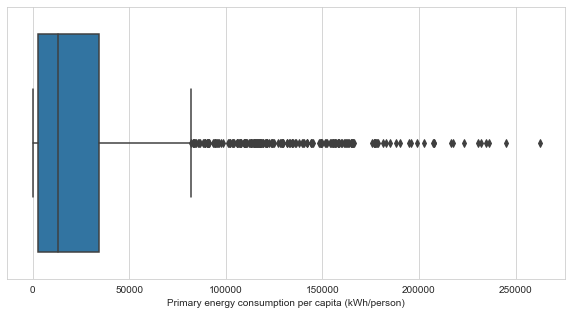

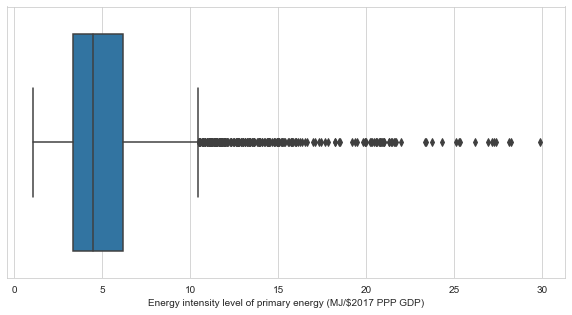

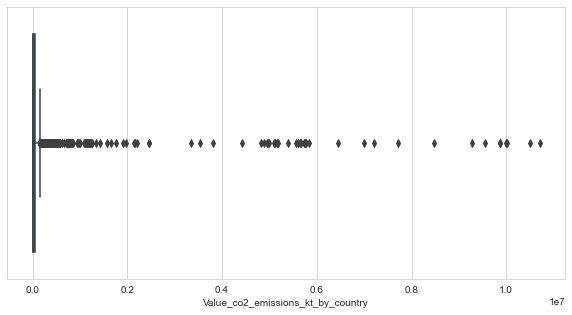

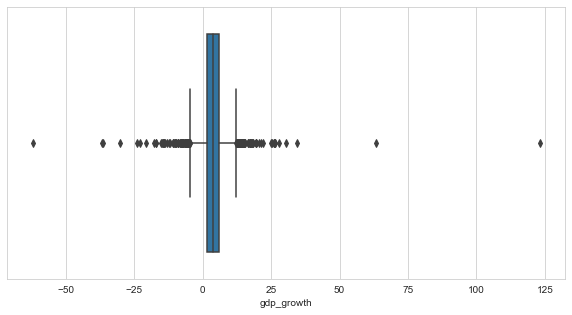

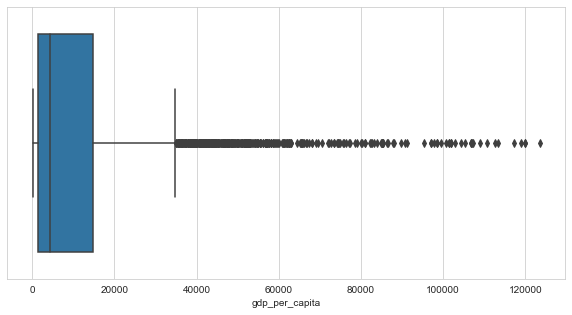

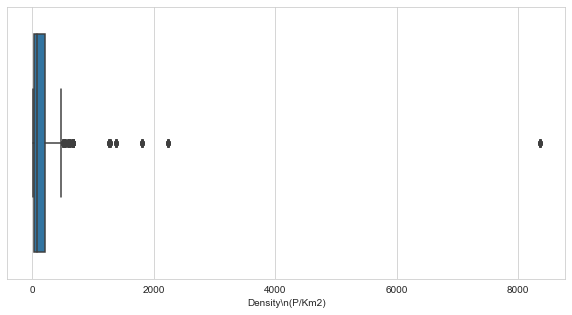

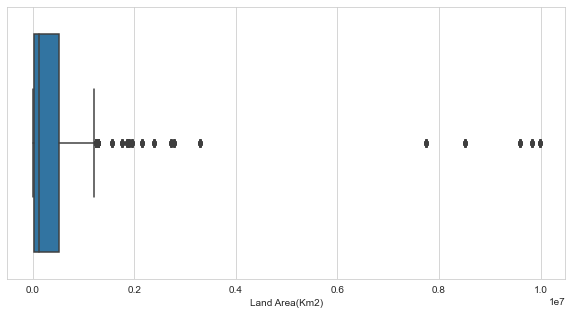

In [97]:
col= df.columns
for i in col:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])

<Figure size 3600x3600 with 0 Axes>

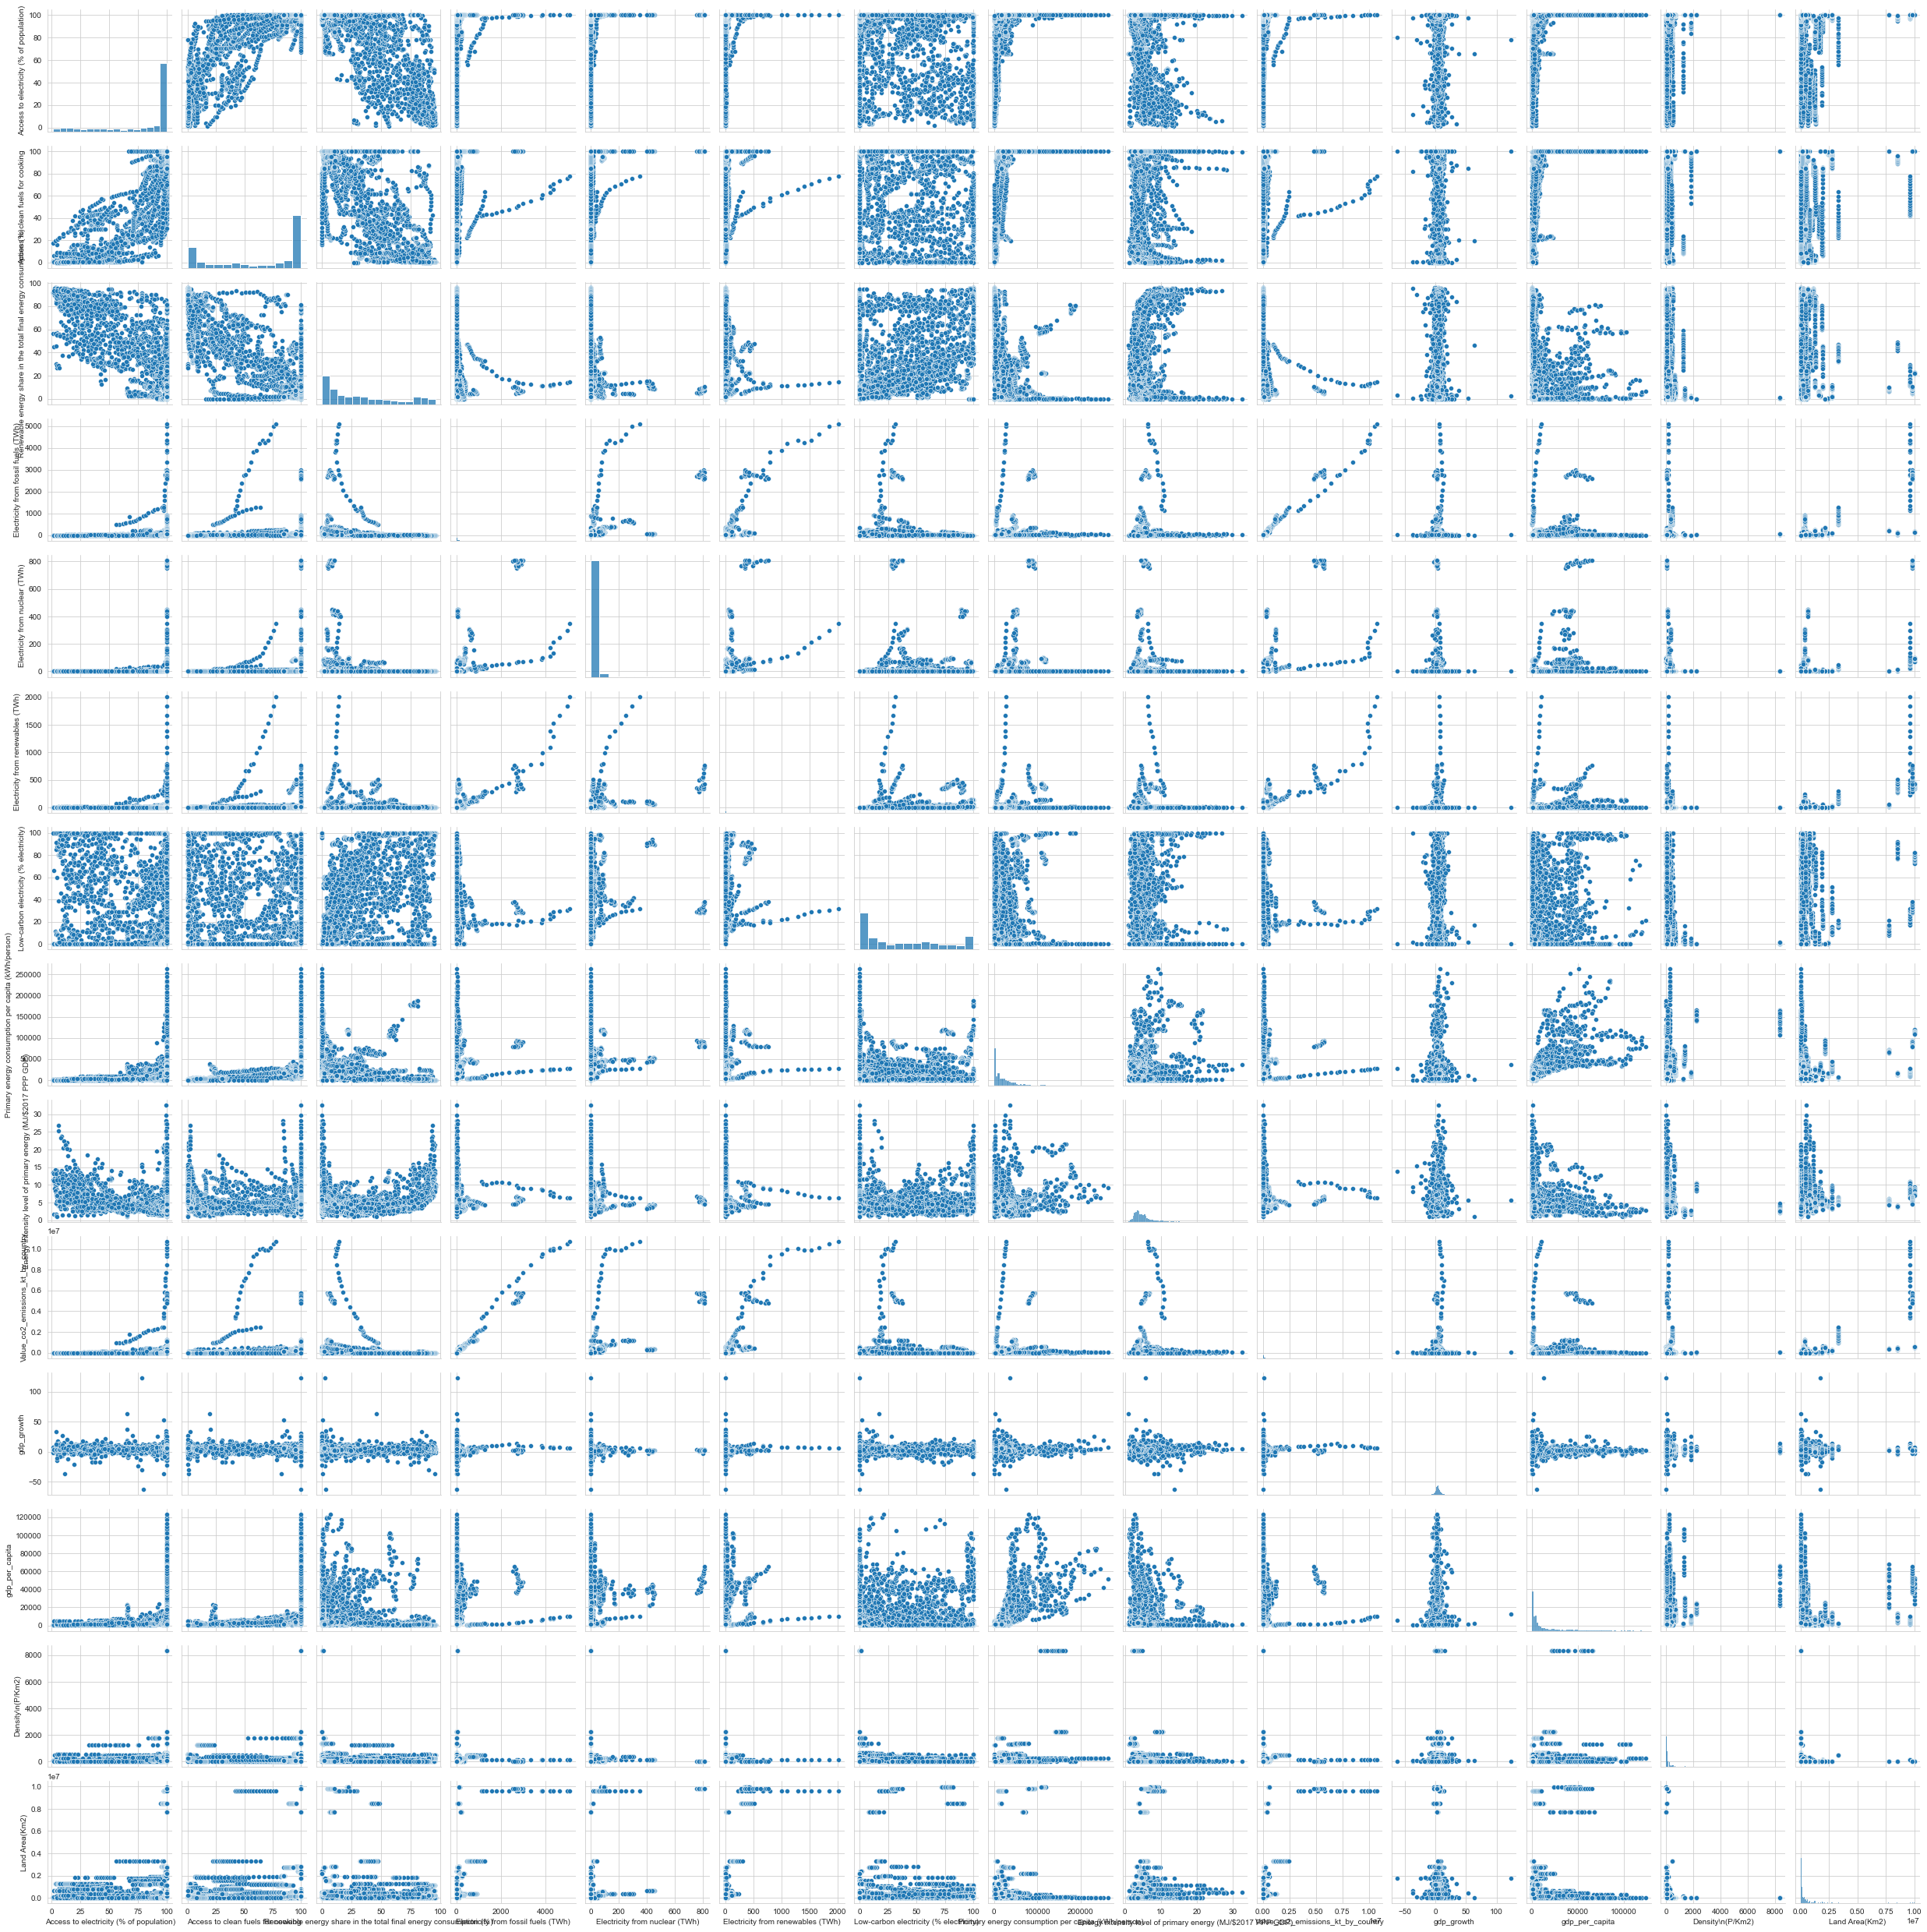

In [56]:
# Multivariate Analysis
plt.figure(figsize=(50,50))
pair= sns.pairplot(df)
# pair.savefig("PairPlot")

# Feature Selection and Outlier Removal


I will apply other feature selection methods also in order to select the best subset of the features, but before that I will evalute the 2 regression models, one with all the features and another with above set of features. 

Outlier Removal


Before taking the decision to remove outliers, I want to evaluate a model with whole data. I am going to use random forest regression since it is robust to outliers. Why am I not inclined towards removing the outliers? Because we have the top 10 countries which amount to the majority of the emissions. A successful model should be able to handle predictions for these countries' Co2 emissions.Removing the data of these countries may lead to loss of information. 


In [98]:
X= df.drop( 'Value_co2_emissions_kt_by_country',axis=1)
y=df[ 'Value_co2_emissions_kt_by_country']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [101]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [102]:
predictions= grid_search.predict(X_test)

In [103]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error 17382.32410267702
r2 score 0.9798973744780453
mean squared error 20179624272.521156
root mean square error 142055.00439097933


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

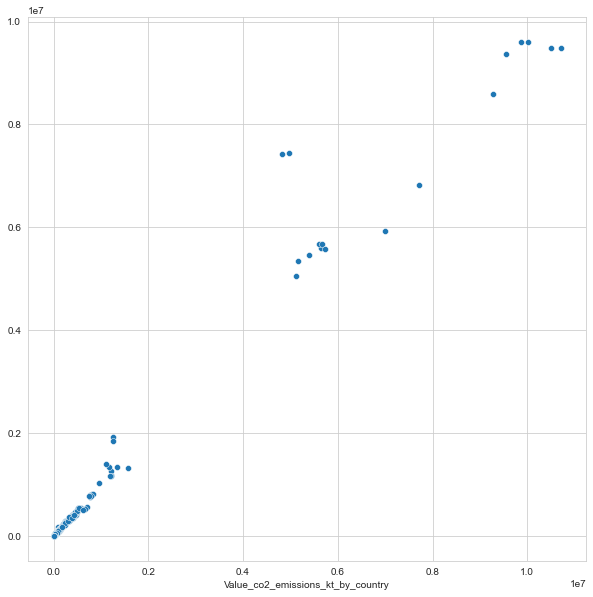

In [104]:
#Scatter plot of y_test vs predictions
plt.figure(figsize=(10,10))
sns.scatterplot(y_test,predictions)

In [105]:
# Finding the best hyperparameters for randomforest regression
rf_with_best_estimator= grid_search.best_estimator_
rf_with_best_estimator

RandomForestRegressor(n_estimators=200)

In [106]:
features= rf_with_best_estimator.feature_importances_

In [107]:
imp_features= features.argsort()[::-1]
imp_features

array([ 3,  5,  2,  0, 11,  4,  7,  9,  6,  8, 10, 12,  1])

In [108]:
# feature dic
feature_n= {}
for i in range(len(X_train.columns)):
    feature_n[i]=X_train.columns[i]
feature_n

{0: 'Access to electricity (% of population)',
 1: 'Access to clean fuels for cooking',
 2: 'Renewable energy share in the total final energy consumption (%)',
 3: 'Electricity from fossil fuels (TWh)',
 4: 'Electricity from nuclear (TWh)',
 5: 'Electricity from renewables (TWh)',
 6: 'Low-carbon electricity (% electricity)',
 7: 'Primary energy consumption per capita (kWh/person)',
 8: 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 9: 'gdp_growth',
 10: 'gdp_per_capita',
 11: 'Density\\n(P/Km2)',
 12: 'Land Area(Km2)'}

In [109]:
for i in imp_features:
    print(feature_n[i])

Electricity from fossil fuels (TWh)
Electricity from renewables (TWh)
Renewable energy share in the total final energy consumption (%)
Access to electricity (% of population)
Density\n(P/Km2)
Electricity from nuclear (TWh)
Primary energy consumption per capita (kWh/person)
gdp_growth
Low-carbon electricity (% electricity)
Energy intensity level of primary energy (MJ/$2017 PPP GDP)
gdp_per_capita
Land Area(Km2)
Access to clean fuels for cooking


In [61]:
# Selected Features 
# feat= ['Access to electricity (% of population)','Electricity from fossil fuels (TWh)', 'Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita','Density\\n(P/Km2)']

In [110]:
df=df[['Access to electricity (% of population)','Electricity from fossil fuels (TWh)', 'Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita','Density\\n(P/Km2)']]

In [111]:
X= df.drop( 'Value_co2_emissions_kt_by_country',axis=1)
y=df[ 'Value_co2_emissions_kt_by_country']


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [115]:
predictions= grid_search.predict(X_test)

In [116]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error 13706.358312760665
r2 score 0.9918117243639702
mean squared error 8219639051.349801
root mean square error 90662.22505183623


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

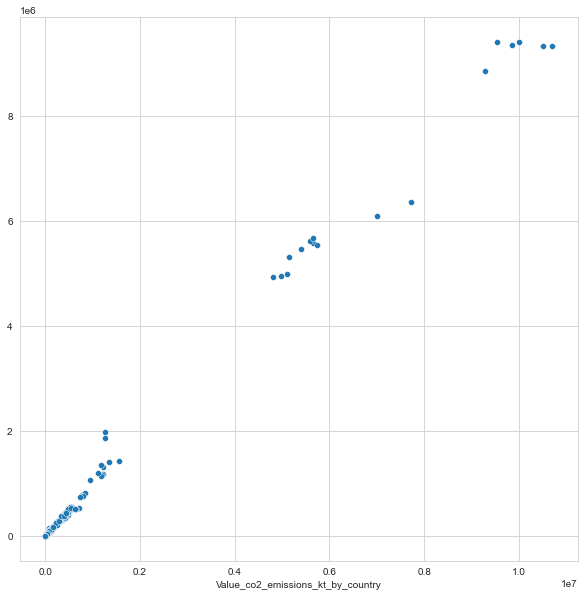

In [121]:
#Scatter plot of y_test vs predictions
plt.figure(figsize=(10,10))
sns.scatterplot(y_test,predictions)

In [122]:
df['Value_co2_emissions_kt_by_country'].describe()

count    2.902000e+03
mean     1.596398e+05
std      7.735081e+05
min      1.000000e+01
25%      2.022500e+03
50%      1.048000e+04
75%      6.050250e+04
max      1.070722e+07
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [128]:
data_2004=data_2004[['Access to electricity (% of population)','Electricity from fossil fuels (TWh)', 'Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita','Density\\n(P/Km2)']]
data_2017=data_2017[['Access to electricity (% of population)','Electricity from fossil fuels (TWh)', 'Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita','Density\\n(P/Km2)']]


In [129]:
x1_test= data_2004.drop('Value_co2_emissions_kt_by_country',axis=1)
y1_test= data_2004['Value_co2_emissions_kt_by_country']

In [130]:
x2_test= data_2017.drop('Value_co2_emissions_kt_by_country',axis=1)
y2_test= data_2017['Value_co2_emissions_kt_by_country']

In [131]:
p1= grid_search.predict(x1_test)
p2=grid_search.predict(x2_test)

In [132]:
print("mean absolute error",mean_absolute_error(y1_test,p1))
print("r2 score",r2_score(y1_test,p1))
print("mean squared error",mean_squared_error(y1_test,p1))
print("root mean square error",np.sqrt(mean_squared_error(y1_test,p1)))

mean absolute error 5236.394982481678
r2 score 0.9992231387458432
mean squared error 299245087.65672326
root mean square error 17298.701906695867


In [138]:
print(data_2004['Value_co2_emissions_kt_by_country'].min())
print(data_2004['Value_co2_emissions_kt_by_country'].max())

9.999999776
5738290.039


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country', ylabel='Density'>

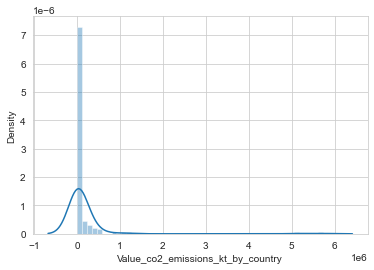

In [139]:
sns.distplot(data_2004['Value_co2_emissions_kt_by_country'])

In [133]:
print("mean absolute error",mean_absolute_error(y2_test,p2))
print("r2 score",r2_score(y2_test,p2))
print("mean squared error",mean_squared_error(y2_test,p2))
print("root mean square error",np.sqrt(mean_squared_error(y2_test,p2)))

mean absolute error 12853.285682483778
r2 score 0.9945146883719801
mean squared error 4480098450.755917
root mean square error 66933.53756343614


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

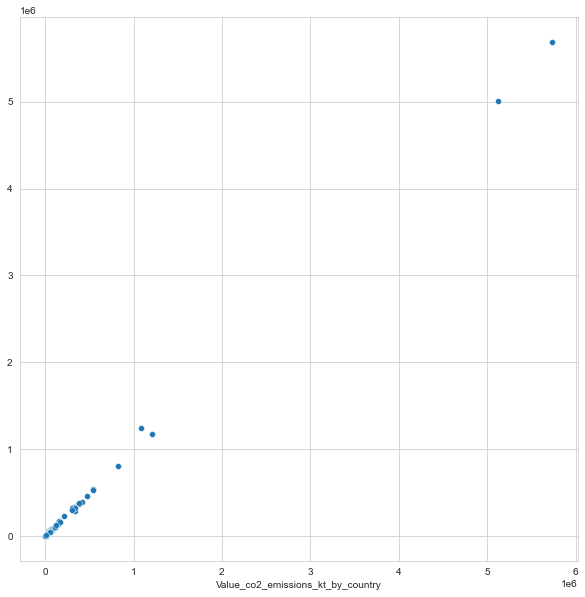

In [136]:
plt.figure(figsize=(10,10))
sns.scatterplot(y1_test,p1)

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

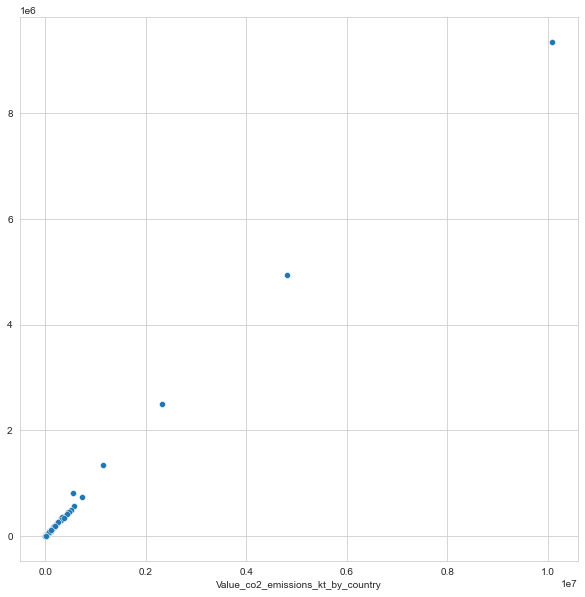

In [137]:
plt.figure(figsize=(10,10))
sns.scatterplot(y2_test,p2)


In [156]:
X= total.drop( 'Value_co2_emissions_kt_by_country',axis=1)
y=total['Value_co2_emissions_kt_by_country']


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [159]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [160]:
predictions= grid_search.predict(X_test)

In [161]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error 10216.498482051533
r2 score 0.9944302010055804
mean squared error 3487851872.267386
root mean square error 59058.038168122264


In [173]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,predictions))

0.1407182067713547


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

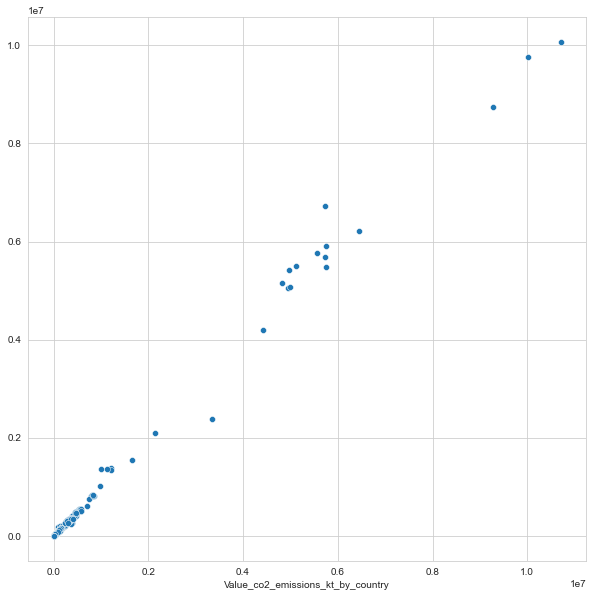

In [162]:
#Scatter plot of y_test vs predictions
plt.figure(figsize=(10,10))
sns.scatterplot(y_test,predictions)

In [170]:
total['Value_co2_emissions_kt_by_country'].sort_values(ascending=False).head(100)

733     1.070722e+07
732     1.050293e+07
731     1.009601e+07
728     1.000667e+07
727     9.984570e+06
            ...     
1296    7.360100e+05
1291    7.348100e+05
1299    7.322000e+05
1300    7.077000e+05
1301    6.574000e+05
Name: Value_co2_emissions_kt_by_country, Length: 100, dtype: float64

In [167]:
1.07E+07
1.05E+07
1.01E+07
1.00E+07
9.98E+06
9.87E+06
9.86E+06
9.54E+06
9.28E+06
8.47E+06
7.72E+06
7.20E+06
6.99E+06
6.44E+06
5.82E+06
5.78E+06
5.75E+06
5.75E+06
5.74E+06
5.74E+06

5740000.0

In [168]:
1.07E+07


10700000.0

In [169]:
5.74E+06

5740000.0

In [171]:
6.574000e+05

657400.0

In [178]:
X= df.drop('Value_co2_emissions_kt_by_country',axis=1)
y= df['Value_co2_emissions_kt_by_country']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lr= LinearRegression()

In [182]:
lr.fit(X_train,y_train)

LinearRegression()

In [183]:
predictions= lr.predict(X_test)

In [185]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print(mean_absolute_percentage_error(y_test,predictions))

mean absolute error 34091.01220889652
r2 score 0.9889863306258063
mean squared error 11055854847.928898
root mean square error 105146.82519186634
34.833687493778896


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country'>

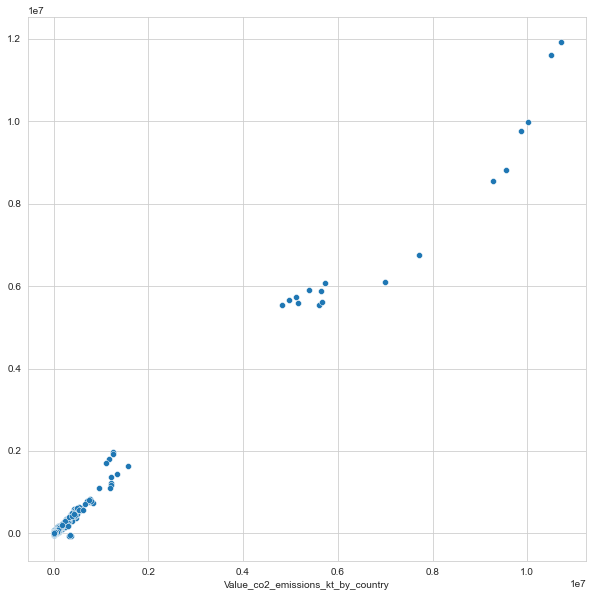

In [187]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_test,predictions)